In [102]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier




In [104]:
data = pd.read_csv('output_variables_1.csv')
data
X = data.drop('Price', axis=1)
y = data[['Price']]

# do fitting
reg = LinearRegression().fit(X, y)
reg.score(X, y)
# save reg to pickle
import pickle
with open('reg.pkl', 'wb') as f:
    pickle.dump(reg, f)
    

# open reg from pickle
with open('reg.pkl', 'rb') as f:
    reg = pickle.load(f)
    
# reg predict first row
reg.predict(X.iloc[0:1, :])[0][0]
# show the coefficients and create dataframe with each of the feature name as header
coefficients = reg.coef_
coefficients = coefficients[0]
coefficients = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Net Sales,-0.178422
COGS,0.217548
Trading Income,0.000000
Other Income,-0.003289
Interest Revenue of Bank,-0.002057
Advertising & Promotion Expense,0.003691
Operational Expense,0.004847
Other Expense,-0.362341
Depreciation of Equipment Clinic Expense,-0.063470
Depreciation of Equipment Non Clinic Expense,0.000000


In [91]:
data = pd.read_csv('output_variables_1.csv')
data

,Net Sales,COGS,Trading Income,Other Income,Interest Revenue of Bank,Advertising & Promotion Expense,Operational Expense,Other Expense,Depreciation of Equipment Clinic Expense,Depreciation of Equipment Non Clinic Expense,Bank Tax Expense,Other Tax,Tangible Assets (PP&E),Net Cash Flow Average,Net Cash Flow Standard Deviation,Net Cash Flow Trend Coefficient,Equipment Usage Ratio,Total Equipments,Price
0,1862463.95,-1053087.000,0.0,6932.24,4334.5,-8064.0,-10216.0,-311702.0,0.0000,0.0,-1547.0,0.00,200000.0,68168.166667,11140.327699,-2260.559441,0.5,8,5573000
1,1486403.39,-594561.356,0.0,0.00,0.0,-285.0,0.0,-1075407.5,-133776.3051,0.0,0.0,-76677.75,200000.0,76198.416667,8229.738651,482.793706,0.5,8,6028000


In [105]:
import pandas as pd
import numpy as np
from scipy.optimize import nnls
import pickle

# Load the data
data = pd.read_csv('output_variables_1.csv')
X = data.drop('Price', axis=1).values  # Convert to NumPy array for nnls
y = data['Price'].values  # Convert to 1D NumPy array

# Perform Non-Negative Least Squares fitting
coefficients, _ = nnls(X, y)

# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame(coefficients, index=data.drop('Price', axis=1).columns, columns=['Coefficient'])

# Save the coefficients to a pickle file
with open('nnls_coefficients.pkl', 'wb') as f:
    pickle.dump(coefficients_df, f)

# Load the coefficients from the pickle file
with open('nnls_coefficients.pkl', 'rb') as f:
    coefficients_df = pickle.load(f)

# Predict the first row using the fitted NNLS coefficients
first_row_prediction = np.dot(X[0, :], coefficients)

# Display the prediction for the first row and the coefficients DataFrame
print(f'Prediction for the first row: {first_row_prediction}')
print(coefficients_df)


Prediction for the first row: 5572999.999999995
                                              Coefficient
Net Sales                                        6.626121
COGS                                             6.426735
Trading Income                                   0.000000
Other Income                                     0.000000
Interest Revenue of Bank                         0.000000
Advertising & Promotion Expense                  0.000000
Operational Expense                              0.000000
Other Expense                                    0.000000
Depreciation of Equipment Clinic Expense         0.000000
Depreciation of Equipment Non Clinic Expense     0.000000
Bank Tax Expense                                 0.000000
Other Tax                                        0.000000
Tangible Assets (PP&E)                           0.000000
Net Cash Flow Average                            0.000000
Net Cash Flow Standard Deviation                 0.000000
Net Cash Flow Trend Coef

In [107]:
import pandas as pd
import numpy as np
import cvxpy as cp
import pickle

# Load the data
data = pd.read_csv('output_variables_1.csv')
X = data.drop('Price', axis=1).values  # Convert to NumPy array for cvxpy
y = data['Price'].values  # Convert to 1D NumPy array

# Define the coefficients and intercept as variables
beta = cp.Variable(X.shape[1])
intercept = cp.Variable()

# Define the objective function (minimize the least squares error)
objective = cp.Minimize(cp.sum_squares(X @ beta + intercept - y))

# Define constraints: ensure all coefficients are non-negative
constraints = [beta >= 0]

# Create and solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Extract the coefficients and intercept
coefficients = beta.value
intercept_value = intercept.value

# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame(coefficients, index=data.drop('Price', axis=1).columns, columns=['Coefficient'])
coefficients_df['Intercept'] = intercept_value

# Save the coefficients to a pickle file
with open('cvxpy_coefficients_non_negative.pkl', 'wb') as f:
    pickle.dump(coefficients_df, f)

# Load the coefficients from the pickle file (for testing purposes)
with open('cvxpy_coefficients_non_negative.pkl', 'rb') as f:
    coefficients_df = pickle.load(f)

# Display the coefficients DataFrame
print(coefficients_df)


                                              Coefficient     Intercept
Net Sales                                        0.027496  6.867645e+06
COGS                                             1.063607  6.867645e+06
Trading Income                                   0.000000  6.867645e+06
Other Income                                     1.322544  6.867645e+06
Interest Revenue of Bank                         1.322544  6.867645e+06
Advertising & Promotion Expense                 13.111318  6.867645e+06
Operational Expense                             13.737705  6.867645e+06
Other Expense                                    0.117528  6.867645e+06
Depreciation of Equipment Clinic Expense         1.022396  6.867645e+06
Depreciation of Equipment Non Clinic Expense     0.000000  6.867645e+06
Bank Tax Expense                                13.591698  6.867645e+06
Other Tax                                        1.301627  6.867645e+06
Tangible Assets (PP&E)                           0.000801  6.867

In [108]:
import pandas as pd
import itertools

# Define the variables
EBIT = [100000, 250000, 400000, 550000, 700000]
EBIT_Ratio = [0, 0.1, 0.22, 0.3, 0.4]
Net_Sales_Growth = [0, 0.05, 0.1, 0.2, 0.3]

# Generate all combinations
combinations = list(itertools.product(EBIT, EBIT_Ratio, Net_Sales_Growth))

# Create a DataFrame from the combinations
df = pd.DataFrame(combinations, columns=['EBIT', 'EBIT Ratio', 'Net Sales Growth'])

df.to_csv('combinations.csv', index=False)

In [118]:
data = pd.read_csv('EBIT_baseline_to_multiple.csv')

In [119]:


# Define the what-if function using the loaded data
def what_if_ebit(ebit, ebit_ratio, net_sales_growth):
    # Define boundary values based on the unique values in the dataset
    ebit_boundaries = sorted(data['EBIT'].unique())
    ebit_ratio_boundaries = sorted(data['EBIT Ratio'].unique())
    net_sales_growth_boundaries = sorted(data['Net Sales Growth'].unique())

    # Round down to nearest boundary value
    ebit = max([val for val in ebit_boundaries if val <= ebit])
    ebit_ratio = max([val for val in ebit_ratio_boundaries if val <= ebit_ratio])
    net_sales_growth = max([val for val in net_sales_growth_boundaries if val <= net_sales_growth])

    # Lookup the row with the closest match
    result = data[(data['EBIT'] == ebit) & 
                  (data['EBIT Ratio'] == ebit_ratio) & 
                  (data['Net Sales Growth'] == net_sales_growth)]

    # Return the EBIT Multiple if a match is found, else return None
    if not result.empty:
        return result['EBIT Multiple'].values[0]
    else:
        return None

# Example usage of the function with user-specified input
example_ebit = 200000
example_ebit_ratio = 0.15
example_net_sales_growth = 0.1

what_if_result = what_if_ebit(example_ebit, example_ebit_ratio, example_net_sales_growth)
what_if_result


1.05

In [120]:
# Example usage of the function
example_ebit = 400000
example_ebit_ratio = 0.05
example_net_sales_growth = 0.5

what_if_result = what_if_ebit(example_ebit, example_ebit_ratio, example_net_sales_growth)
what_if_result

4.95

In [1]:
import pandas as pd

data_df = pd.DataFrame(
    {
        "Equipment": [
        "Intra Oral Camera",
        "Bleaching Unit",
        "Ultrasonic Scaler",
        "Light Cure",
        "Dental Unit",
        "Portable Xrays",
        "Endomotor",
        "Autoclaves",
        "Ultrasonic Cleaner",
        "Water Tank",
        "Prophylaxis Hand Piece",
        "Handpiece Set",
        "Compressor",
        "Apex Locator",
        "Dental Loupe",
        "Portable Light",
        "Camera DSLR",
        "Water Tank Hose",
        "Sealing Machine",
        "Xray Sensor"
    ],
        "Own?": [True] * 20,  # Default value for ownership is True
        "Quantity": [1] * 20 ,  # Random integer values between 1 and 4,
        "Expected Lifetime": [4] * 20,  # Random integer values between 3 and 7
        "Current Lifetime Usage": [2] * 20  # Initialize with zeros
    }
)

In [2]:
# add columns to the dataframe called price
data_df['Price'] = [1729.5,
487.5,
1349.5,
595,
30500,
9750,
997.5,
11500,
2500,
900,
175,
2000,
3325,
600,
250,
250,
2907.5,
10,
1500,
9500]

data_df.to_csv('equipment_data.csv', index=False)

In [ ]:
import pandas as pd
import itertools

# Define the variables
Number_of_Dentist = [1, 2, 3, 4, 5]
EBIT_Ratio = [0, 0.1, 0.22, 0.3, 0.4]
Net_Sales_Growth = [0, 0.05, 0.1, 0.2, 0.3]

# Generate all combinations
combinations = list(itertools.product(EBIT, EBIT_Ratio, Net_Sales_Growth))

# Create a DataFrame from the combinations
df = pd.DataFrame(combinations, columns=['EBIT', 'EBIT Ratio', 'Net Sales Growth'])

df.to_csv('combinations_dentist_count.csv', index=False)

In [1]:
import pandas as pd
import numpy as np

# Manually defining the starting point to ensure both datasets have equal cumulative sales over 36 months.

# Recalculate monthly and annual increase factors for clarity
months = 36  # Total number of months in the dataset
annual_increase_rate = 0.10  # 10% annual increase
monthly_increase_factor = (1 + annual_increase_rate) ** (1 / 12)  # Convert annual increase to a monthly factor
annual_increase_factor = 1 + annual_increase_rate  # Annual increase factor remains 10% for the second dataset

# Start with a reasonable base sales amount and adjust it
starting_sales = 1000  # Starting guess for a common base sales amount

# Calculate monthly sales with compound monthly growth
monthly_sales = [starting_sales * (monthly_increase_factor ** i) for i in range(months)]

# Calculate annual sales where values remain the same for each year
annual_sales = []
for i in range(months):
    year = i // 12  # Determine the current year (0, 1, 2)
    sales_value = starting_sales * (annual_increase_factor ** year)
    annual_sales.append(sales_value)

# Calculate the cumulative totals for both datasets
total_monthly_sales = sum(monthly_sales)
total_annual_sales = sum(annual_sales)

# Adjust the starting sales amount proportionally to match cumulative totals
scaling_factor = total_annual_sales / total_monthly_sales
adjusted_starting_sales = starting_sales * scaling_factor

# Recalculate the sales datasets with the adjusted starting value
adjusted_monthly_sales = [adjusted_starting_sales * (monthly_increase_factor ** i) for i in range(months)]
adjusted_annual_sales = []
for i in range(months):
    year = i // 12
    sales_value = adjusted_starting_sales * (annual_increase_factor ** year)
    adjusted_annual_sales.append(sales_value)

# Create the final DataFrame for display
final_adjusted_data = {
    'Month': pd.date_range(start='2024-01-01', periods=months, freq='M'),
    'Monthly_Increase_Sales': adjusted_monthly_sales,
    'Annual_Increase_Sales': adjusted_annual_sales
}

df_final_adjusted = pd.DataFrame(final_adjusted_data)

In [5]:
df_final_adjusted

,Month,Monthly_Increase_Sales,Annual_Increase_Sales
0,2024-01-31,956.896851,956.896851
1,2024-02-29,964.527281,956.896851
2,2024-03-31,972.218557,956.896851
3,2024-04-30,979.971165,956.896851
4,2024-05-31,987.785592,956.896851
5,2024-06-30,995.662333,956.896851
6,2024-07-31,1003.601885,956.896851
7,2024-08-31,1011.604747,956.896851
8,2024-09-30,1019.671425,956.896851
9,2024-10-31,1027.802428,956.896851


In [6]:
# do linear regression for column Monthly_Increase_Sales and return the slope
from sklearn.linear_model import LinearRegression

X = np.arange(len(df_final_adjusted)).reshape(-1, 1)
y = df_final_adjusted['Monthly_Increase_Sales']
y = df_final_adjusted['Annual_Increase_Sales']

reg = LinearRegression().fit(X, y)
reg.score(X, y) 
slope = reg.coef_[0]
slope


7.448278195213878

### Preprocess Haoey Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('haoey_data.csv')
data

,Provider,Patient,No,Date,Item,Treatment Code Name Original,Tooth,Note,Invoice,Payment,Amount,Location,year,date1,PurchaseDate,Total_cost
0,"Ha, Thomas","Jones, Kim",1750301689,2023-12-21 00:00:00,72,Photographic records – intraoral – per appoint...,NaN,No,117828.0,Good,30.0,Potts Point,2023,2023-12-21 00:00:00,2023-12-21,30.0
1,"Ha, Thomas","Jones, Kim",1750301689,2023-12-21 00:00:00,72,Photographic records – intraoral – per appoint...,NaN,No,117828.0,Good,30.0,Potts Point,2023,2023-12-21 00:00:00,2023-12-21,30.0
2,"Ha, Thomas","Jones, Kim",1750301689,2023-12-21 00:00:00,114,Cleaning,NaN,No,117828.0,Good,160.0,Potts Point,2023,2023-12-21 00:00:00,2023-12-21,160.0
3,"Ha, Thomas","Jones, Kim",1750301689,2023-12-21 00:00:00,11,Oral Examination,NaN,Yes,117828.0,Good,110.0,Potts Point,2023,2023-12-21 00:00:00,2023-12-21,110.0
4,"Ha, Thomas","Shaw, Jeannette",2-000713,2023-12-21 00:00:00,613,Crown,27.0,No,117827.0,Good,1800.0,Potts Point,2023,2023-12-21 00:00:00,2023-12-21,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31958,"Oey, Julian","Ha, Steven",1-005067,2021-01-04 00:00:00,114,Cleaning,NaN,Yes,72099.0,Good,140.0,Matraville,2021,2021-01-04 00:00:00,2021-01-04,140.0
31959,"Oey, Julian","Ha, Steven",1-005067,2021-01-04 00:00:00,121,Remineralisation Agents,NaN,Yes,72099.0,Good,60.0,Matraville,2021,2021-01-04 00:00:00,2021-01-04,60.0
31960,"Oey, Julian","Ha, Steven",1-005067,2021-01-04 00:00:00,72,Photographic records – intraoral – per appoint...,18.0,Yes,72099.0,Good,40.0,Matraville,2021,2021-01-04 00:00:00,2021-01-04,40.0
31961,"Oey, Julian","Ha, Steven",1-005067,2021-01-04 00:00:00,73,Photographic records – extraoral – per appoint...,18.0,Yes,72099.0,Good,40.0,Matraville,2021,2021-01-04 00:00:00,2021-01-04,40.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data_by_patient_spending = data.groupby(['Year', 'Patient'])['Total_cost'].sum()
print(data_by_patient_spending)

Year  Patient             
2021  Abraham, Rosalind        440.00
      Abu-Isnineh, Rasheed    1565.00
      Aerlic, Niko*           1980.75
      Afandi, Ronnie *         313.25
      Agarwal, Pratibha        410.00
                               ...   
2023  Zhou, Can Hua            350.00
      Zhou, Ping              7500.00
      Zhu, Feng Ying           730.00
      Zubkova, Anastassia      290.00
      zaicew, chelsea          709.50
Name: Total_cost, Length: 3135, dtype: float64


In [12]:
data_by_patient_spending.groupby('Year').std()

Year
2021    2790.437864
2022    2477.958879
2023    2242.351253
Name: Total_cost, dtype: float64

In [8]:
# Now calculate the coefficient of variation (CV) for each year
def calculate_cv_for_year(group):
    return (group.std() / group.mean()) * 100

# Grouping by Year and calculating CV
cv_per_year = data_by_patient_spending.groupby('Year').apply(calculate_cv_for_year)
cv_per_year

Year
2021    155.567330
2022    156.170083
2023    155.290561
Name: Total_cost, dtype: float64

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data_by_year = data.groupby('Year')['Patient'].nunique()
data_by_year


Year
2021    1021
2022    1109
2023    1005
Name: Patient, dtype: int64

In [14]:
# create dataframe out of data_by_year and make the index year as a column
data_by_year = data_by_year.reset_index()

#drop the index column
# data_by_year = data_by_year.drop('index', axis=1)
data_by_year = data_by_year.rename(columns={'Number_of_Patients': 'Number of Unique Patients'})

data_by_year.to_csv('haoey_number_patients_yearly.csv', index=False)

In [14]:
data_by_year.mean()

1045.0

In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel(r'company_data/Acre Data.xlsx', sheet_name='main_variables')
data

,Category,Sub Category,Variable,Value
0,Profit & Loss,Gross Profit,Net Sales,1.862464e+06
1,Profit & Loss,Gross Profit,COGS,-1.053087e+06
2,Profit & Loss,Gross Profit,Trading Income,0.000000e+00
3,Profit & Loss,Other Income,Other Income,6.932240e+03
4,Profit & Loss,Other Income,Interest Revenue of Bank,-4.334500e+03
5,Profit & Loss,Operating Expense,Advertising & Promotion Expense,-8.063710e+03
6,Profit & Loss,Operating Expense,Operational Expense,-1.021609e+04
7,Profit & Loss,Operating Expense,Other Expense,-3.117025e+05
8,Profit & Loss,Depreciation,Depreciation of Equipment Clinic Expense,0.000000e+00
9,Profit & Loss,Depreciation,Depreciation of Equipment Non Clinic Expense,0.000000e+00


In [5]:
# convert the last three row of 'Value' column to integer
data['Value'].iloc[-3:] = data['Value'].iloc[-3:].astype(int)

C:\Users\Zak\AppData\Local\Temp\ipykernel_14764\2904961405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Value'].iloc[-3:] = data['Value'].iloc[-3:].astype(int)


In [2]:
import pickle
clinic_value = pickle.load(open('clinic_value.pkl', 'rb'))
print(clinic_value)

958086.9864


### Trial Swarmplot

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Zak\AppData\Local\Temp\ipykernel_8652\1447544973.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


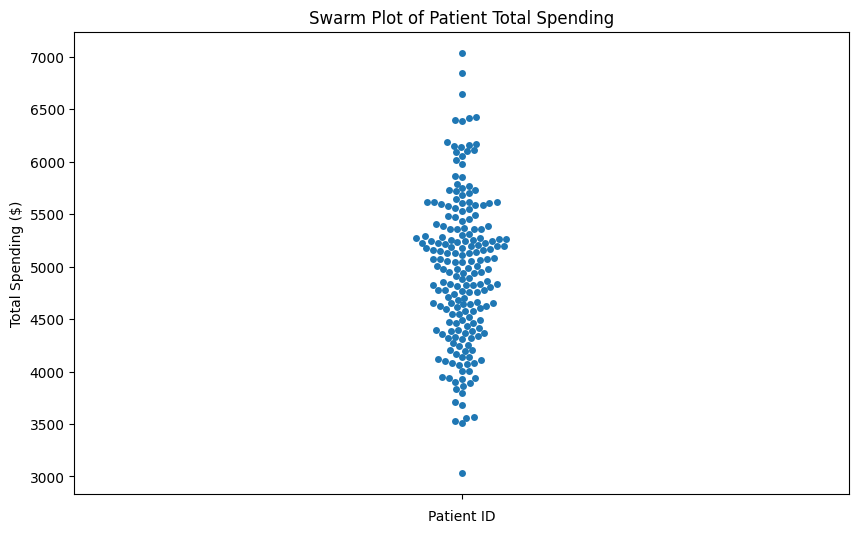

In [17]:
# Parameters
num_patients = 200
mean_spending = 5000  # Set an arbitrary mean for patient spending in dollars
relative_variability = 0.15  # 15% coefficient of variation

# Calculate standard deviation based on relative variability
std_spending = mean_spending * relative_variability

# Generate dummy data for patient spending using a normal distribution
np.random.seed(42)  # For reproducibility
total_spending = np.random.normal(loc=mean_spending, scale=std_spending, size=num_patients)

# Ensure no negative spending values
total_spending = np.clip(total_spending, 0, None)

# Create patient IDs
patient_ids = [f'Patient {i+1}' for i in range(num_patients)]

# Create the dataframe
spending_df = pd.DataFrame({
'Patient ID': patient_ids,
'Total Spending': total_spending
})


fig, ax = plt.subplots(figsize=(10, 6))

# Generate the swarm plot
sns.swarmplot( y='Total Spending', data=spending_df, ax=ax)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set plot title and labels
ax.set_title('Swarm Plot of Patient Total Spending')
ax.set_xlabel('Patient ID')
ax.set_ylabel('Total Spending ($)')

plt.show()

In [3]:
import pandas as pd
import numpy as np

# Setting the Year and Month
data = {
    'Year': [2023] * 12,
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
}

# Calculating the net sales with the total sum of 1862464 and a coefficient of variation of around 15%
total_sales = 1862464
mean_sales = total_sales / 12
cv = 0.15  # Coefficient of variation
stdev = mean_sales * cv

# Generating random net sales with the specified mean and standard deviation
np.random.seed(19)  # For reproducibility
net_sales = np.random.normal(loc=mean_sales, scale=stdev, size=12)

# Adjusting the net sales so that the total is exactly 1862464
net_sales = net_sales / net_sales.sum() * total_sales
data['Net Sales'] = np.round(net_sales).astype(int)

# Creating the DataFrame
df = pd.DataFrame(data)

In [5]:
df.to_csv('data.csv', index=False)

### Dummy Transaction

In [6]:
import pandas as pd
import numpy as np
from random import randint, choice
import datetime

# Create the dummy dataframe for patient transactions
num_rows = 100
total_price = 1862464

# Generate patient IDs
patient_ids = [f'Patient_{str(i).zfill(3)}' for i in range(1, num_rows + 1)]

# Random dates between January and December 2023
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 12, 31)

def random_date(start, end):
    return start + datetime.timedelta(days=randint(0, (end - start).days))

dates = [random_date(start_date, end_date) for _ in range(num_rows)]

# Random treatments between 'Treatment A' to 'Treatment Z'
treatments = [f'Treatment {chr(i)}' for i in range(65, 91)]  # A to Z

# Randomly assign treatments
random_treatments = [choice(treatments) for _ in range(num_rows)]

# Random prices that sum up to total_price
mean_price = total_price / num_rows
stdev_price = mean_price * 0.2  # 20% variation for prices

# Generate random prices with a target total
prices = np.random.normal(loc=mean_price, scale=stdev_price, size=num_rows)
prices = prices / prices.sum() * total_price  # Adjust prices to sum to total
prices = np.round(prices).astype(int)  # Convert to integers

# Create the DataFrame
patient_transaction = pd.DataFrame({
    'Patient ID': [choice(patient_ids) for _ in range(num_rows)],  # Randomize patient repetition
    'Date': dates,
    'Treatment': random_treatments,
    'Price': prices
})


In [8]:
patient_transaction.to_csv('patient_transaction.csv', index=False)

In [2]:
import pandas as pd
patient_transaction = pd.read_csv('patient_transaction.csv')
patient_transaction['Date'] = pd.to_datetime(patient_transaction['Date'])
patient_transaction['Year'] = patient_transaction['Date'].dt.year


In [7]:
pd.DataFrame(patient_transaction.groupby('Patient ID')['Price'].sum().sort_values(ascending=False).reset_index())

,Patient ID,Price
0,Patient_043,72248
1,Patient_020,67550
2,Patient_014,63964
3,Patient_033,62693
4,Patient_029,57469
...,...,...
60,Patient_035,14118
61,Patient_080,13872
62,Patient_025,13325
63,Patient_052,13178


In [19]:
patient_transaction.groupby('Patient ID')['Price'].sum().std() / patient_transaction.groupby('Patient ID')['Price'].sum().mean() * 100


52.982084594441226

### Attempt to create a forecast cashflow for current clinic givent clinic_value.pkl

In [1]:
# load clinic_value.pkl
import pickle
import pandas as pd
import numpy as np
clinic_value = pickle.load(open('clinic_value.pkl', 'rb'))
clinic_value


{'Net Sales': 1862464.0,
 'COGS': -1053087.0,
 'Trading Income': 0.0,
 'Other Income': 6932.0,
 'Interest Revenue of Bank': 4335.0,
 'Advertising & Promotion Expense': 0,
 'Operational Expense': -10216.0,
 'Other Expense': -319766.0,
 'Depreciation of Equipment Clinic Expense': 0.0,
 'Depreciation of Equipment Non Clinic Expense': 0.0,
 'Bank Tax Expense': -1547.0,
 'Other Tax': 0.0,
 'Equipments Value': 80816.5,
 'Equipment Usage Ratio': 0.5,
 'Total Equipments': 19,
 'Net Sales Growth': 0.13,
 'Total Remaining Value': 40408.25,
 'Relative Variation of Net Sales': 0.15,
 'Number of Active Patients': 1045,
 'Relative Variation of Patient Spending': 0.15,
 'Risk of Leaving Dentist': 0.27882429306415785,
 'EBIT': 490662.0,
 'EBIT Ratio': 0.2618636293043132,
 'Operating Income': 490662.0,
 'EBIT Multiple': 2.336609290472129,
 'Clinic Valuation Adjusted': 1146485.3876816358,
 'Clinic Valuation': 1146485.3876816358}

In [34]:
ebit = clinic_value['EBIT']
monthly_ebit = ebit / 12
net_sales_growth = clinic_value['Net Sales Growth'] 
net_sales_growth_monthly = net_sales_growth / 12
relative_variation_net_sales = clinic_value['Relative Variation of Net Sales']
net_sales_growth



0.13

In [30]:
import numpy as np
import pandas as pd

def forecast_ebit_flow(initial_EBIT, ebit_growth_monthly, number_of_forecasted_periods, relative_variation):
    """
    Generates a DataFrame of forecasted EBIT values.
    
    Parameters:
    initial_EBIT: The EBIT at period 0 (not displayed).
    ebit_growth_monthly: The average monthly growth rate of EBIT.
    number_of_forecasted_periods: Number of forecast periods (months).
    relative_variation: Desired coefficient of variation (CV) of the forecasted EBIT values.
    
    Returns:
    DataFrame with two columns: 'Period' (1 to N) and 'EBIT'.
    """
    
    # Create an array for the period
    periods = np.arange(1, number_of_forecasted_periods + 1)
    
    # Calculate the deterministic growth component (trend)
    trend = initial_EBIT * (1 + ebit_growth_monthly) ** periods
    
    # Introduce random variation based on the relative variation (CV)
    # Coefficient of variation is std/mean, so we introduce noise with appropriate std
    random_variation = np.random.normal(loc=0, scale=relative_variation, size=number_of_forecasted_periods)
    
    # Combine the trend with the variation, ensuring positive EBIT values
    ebit_values = trend * (1 + random_variation)
    
    # Create a DataFrame for the result
    forecast_df = pd.DataFrame({
        'Period': periods,
        'EBIT': ebit_values
    })
    
    return forecast_df


In [31]:
df = forecast_ebit_flow(monthly_ebit, net_sales_growth_monthly, 12, relative_variation_net_sales)
df

,Period,EBIT
0,1,45660.496995
1,2,47419.182311
2,3,43210.710538
3,4,56295.277521
4,5,37945.163183
5,6,37813.518822
6,7,37732.839706
7,8,38201.959914
8,9,59845.341143
9,10,49996.581405


In [32]:
# CV
df['EBIT'].std() / df['EBIT'].mean()

0.1717170589230564

In [33]:
# Growth
(df['EBIT'].sum() - ebit) / ebit

0.12298881718670612

In [36]:
df = df.rename(columns={'EBIT': 'Profit'})
df.to_csv('current_clinic_cashflow_forecast.csv', index=False)

In [5]:
df = forecast_ebit_flow(initial_EBIT=1000, 
                                 ebit_growth_monthly=0.02, 
                                 number_of_forecasted_periods=12, 
                                 relative_variation=0.1)



In [35]:
df['EBIT'].std() / df['EBIT'].mean()

0.16032096478740077

In [36]:
df['EBIT'].sum() / (1000*12)

1.1775636115696755

In [18]:
net_sales_growth

0.13